### **Loading Data:**

In [ ]:
# Loading Data:
import pandas as pd
import numpy as np
from IPython.display import display

print("Loading the dataset...")
try:
    data = pd.read_csv('/content/owid-covid-data.csv')
    print("Data loaded successfully.")
    display(data.head())  # Display the DataFrame
except Exception as e:
    print(f"Error loading data: {e}")

Loading the dataset...
Data loaded successfully.


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


### **Preprocessing Data:**

In [ ]:
print("Preprocessing data...")
try:
    # Filtering data for a specific country (e.g., Afghanistan)
    afghanistan_data = data[data['location'] == 'Afghanistan'][['date', 'total_cases']].dropna()
    afghanistan_data['date'] = pd.to_datetime(afghanistan_data['date'])
    afghanistan_data = afghanistan_data.reset_index(drop=True)
    afghanistan_data['Day'] = np.arange(len(afghanistan_data))

    print("Data preprocessed successfully.")
    display(afghanistan_data.head())  # Display the DataFrame
except Exception as e:
    print(f"Error preprocessing data: {e}")


Preprocessing data...
Data preprocessed successfully.


,date,total_cases,Day
0,2020-03-01,1.0,0
1,2020-03-02,1.0,1
2,2020-03-03,1.0,2
3,2020-03-04,1.0,3
4,2020-03-05,1.0,4


### **Data Augmentation**

In [ ]:
print("Performing data augmentation by adding noise...")
try:
    noise = np.random.normal(0, 0.1, afghanistan_data['total_cases'].shape)
    augmented_cases = afghanistan_data['total_cases'] + afghanistan_data['total_cases'] * noise
    afghanistan_data['Augmented_Cases'] = augmented_cases

    print("Data augmentation completed successfully.")
    display(afghanistan_data.head())  # Display the DataFrame
except Exception as e:
    print(f"Error in data augmentation: {e}")


Performing data augmentation by adding noise...
Data augmentation completed successfully.


,date,total_cases,Day,Augmented_Cases
0,2020-03-01,1.0,0,1.084169
1,2020-03-02,1.0,1,0.907965
2,2020-03-03,1.0,2,1.183406
3,2020-03-04,1.0,3,1.133124
4,2020-03-05,1.0,4,0.889589


### **Preparing Data for Polynomial Regression:**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Preparing data for Polynomial Regression...")
try:
    X = afghanistan_data[['Day']].values
    y = afghanistan_data['Augmented_Cases'].values
    print("Data prepared for Polynomial Regression.")
except Exception as e:
    print(f"Error preparing data for Polynomial Regression: {e}")


Preparing data for Polynomial Regression...
Data prepared for Polynomial Regression.


### **Optimization**

In [ ]:
# Optimization:
print("Performing Grid Search for Optimization...")
try:
    # Define the parameter grid for optimization
    param_grid = {'polynomialfeatures__degree': [2, 3, 4, 5, 6]}

    # Create the pipeline
    poly_pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

    # Perform Grid Search for Hyperparameter Tuning (Optimization)
    grid_search = GridSearchCV(poly_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)

    # Best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print(f'Best parameters: {best_params}')
    print(f'Best model: {best_model}')
except Exception as e:
    print(f"Error in optimization: {e}")

Performing Grid Search for Optimization...
Best parameters: {'polynomialfeatures__degree': 2}
Best model: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])


# Making predictions

In [ ]:
print("Making predictions with the optimized model...")
try:
    y_pred_best = best_model.predict(X)
    print("Predictions made successfully.")
except Exception as e:
    print(f"Error making predictions: {e}")


Making predictions with the optimized model...
Predictions made successfully.


# Plotting the results

Plotting the results...


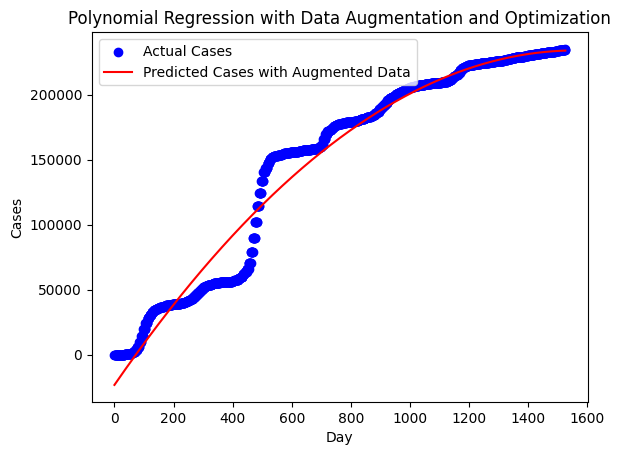

Results plotted successfully.


In [ ]:
print("Plotting the results...")
try:
    plt.scatter(X, afghanistan_data['total_cases'], color='blue', label='Actual Cases')
    plt.plot(X, y_pred_best, color='red', label='Predicted Cases with Augmented Data')
    plt.title('Polynomial Regression with Data Augmentation and Optimization')
    plt.xlabel('Day')
    plt.ylabel('Cases')
    plt.legend()
    plt.show()
    print("Results plotted successfully.")
except Exception as e:
    print(f"Error plotting the results: {e}")

### **Analysis:**

In [ ]:
# Calculating Mean Squared Error:
print("Calculating Mean Squared Error...")
try:
    mse_best = mean_squared_error(afghanistan_data['total_cases'], y_pred_best)
    r2_best = r2_score(afghanistan_data['total_cases'], y_pred_best)
    mae_best = mean_absolute_error(afghanistan_data['total_cases'], y_pred_best)

    print(f'Mean Squared Error with Data Augmentation and Optimization: {mse_best}')
    print(f'R-squared with Data Augmentation and Optimization: {r2_best}')
    print(f'Mean Absolute Error with Data Augmentation and Optimization: {mae_best}')
except Exception as e:
    print(f"Error calculating evaluation metrics: {e}")

Calculating Mean Squared Error...
Mean Squared Error with Data Augmentation and Optimization: 190569615.1117268
R-squared with Data Augmentation and Optimization: 0.9687925315944729
Mean Absolute Error with Data Augmentation and Optimization: 9358.603695914764
